In [61]:
# load and autoreload
from IPython import get_ipython
# noinspection PyBroadException
try:
    _magic = get_ipython().magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass
    

import os 
import glob
import sys
import pprint
import datetime as dt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt 
import xarray as xr 
import seaborn as sns
import cartopy as crt

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
f = './data/south.america.subnational.mortality.txt'

In [63]:
df = pd.read_csv(f)

In [64]:
IC,CN,AI,AN,FR,DT,DE = ('iso_code', 'country_name', 'adm1_isocode', 'adm1_name', 'frequency',
       'date', 'deaths')

In [65]:
nam = df.drop_duplicates([CN,AN])[[CN,AN,AI]]

In [66]:
con = df.drop_duplicates(CN)[CN]

In [67]:
nam.to_csv('./data/coun_adm.csv')

In [68]:
cdf = pd.read_csv('./data/city_data.csv',na_values='QuantityMagnitude[Missing["NotAvailable"]]')
cdf['Elevation'] = cdf['Elevation']/1000

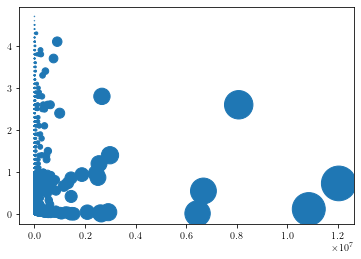

In [69]:
plt.scatter(cdf['Population'],cdf['Elevation'],s=cdf['Population']/10000)

In [70]:
g1= cdf.groupby('AdministrativeDivision')
g= cdf.groupby('Country')

In [71]:
g['Population'].sum()

Country
Bolivia       6480392
Brazil      157831577
Chile        17943835
Colombia     39736325
Ecuador      10688524
Paraguay      4470748
Peru         21902526
Uruguay       3091253
Name: Population, dtype: int64

In [72]:
c1 = cdf[cdf['Elevation'].notna()].copy()
c1['pop_el'] = c1['Population']*c1['Elevation']

In [73]:
g1 = c1.groupby('AdministrativeDivision')

In [74]:
wh = (g1['pop_el'].sum()/g1['Population'].sum())
wh.name = 'weighted_height'
div = wh.to_frame()

In [75]:
div['pop'] = g1['Population'].sum()

In [76]:
from statsmodels.stats.weightstats import DescrStatsW

In [77]:
st = {}
for g,v in g1:
    values = v['Elevation']
    weights = v['Population']
    st[g]=DescrStatsW(values, weights=weights, ddof=1).std
st = pd.Series(st)

In [78]:
div['stw']=st

In [79]:
d1 = div.sort_values('pop',ascending=False)

In [80]:
df['dt']=pd.to_datetime(df['date'])
df1 = df.set_index('dt')

In [81]:
df2=df1.groupby(['adm1_isocode',pd.Grouper(freq='M')]).sum()['deaths'].unstack().T

In [82]:
df3 = df2['2019-01-01':'2019-12-31']

In [83]:
df3.index = df3.index.month

In [84]:
df3.isna().sum().sum()

0

In [85]:
mm = df2['2020-03':'2021-07']

In [86]:
mm.index = mm.index.month

In [87]:
m2 = mm.sum()/(mm * 0 + df3).sum()

In [88]:
m1 = (mm/df3).mean()

In [89]:
m1.plot()
m2.plot()
ax = plt.gca()
ax.axhline(1)
ax.set_ylim(0.5,3)

(0.5, 3.0)

RuntimeError: latex was not able to process the following string:
b'adm1_isocode'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/aliaga/.matplotlib/tex.cache/9dc3f375095695e7d26e072fe1409261.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2021/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2021/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2021/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2021/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2021/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2021/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2021/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2021/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 9dc3f375095695e7d26e072fe1409261.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily adm1_
                     isocode}
No pages of output.
Transcript written on 9dc3f375095695e7d26e072fe1409261.log.




<Figure size 432x288 with 1 Axes>

In [90]:
adm_dic=pd.read_csv('./data/adm_dic.csv')

In [91]:
m2.name='ratio'
m3 = m2.to_frame()

In [92]:
f1 = pd.merge(m2,adm_dic,left_index=True, right_on='admi',how='inner',
         validate='1:1')

In [93]:
f1

,ratio,mname,pop,country,adm,admi
0,1.542251,"Beni, Bolivia",421196.0,Bolivia,Beni,BO-B
2,1.506961,"Cochabamba, Bolivia",1930143.0,Bolivia,Cochabamba,BO-C
1,1.355171,"Chuquisaca, Bolivia",576153.0,Bolivia,Chuquisaca,BO-H
3,1.756581,"La Paz, Bolivia",2706359.0,Bolivia,La Paz,BO-L
5,1.923077,"Pando, Bolivia",110436.0,Bolivia,Pando,BO-N
...,...,...,...,...,...,...
166,0.888889,"Salto, Uruguay",124878.0,Uruguay,Salto,UY-SA
167,0.962594,"San Jose, Uruguay",108309.0,Uruguay,San Jose,UY-SJ
168,0.964088,"Soriano, Uruguay",82595.0,Uruguay,Soriano,UY-SO
169,0.889441,"Tacuarembo, Uruguay",90053.0,Uruguay,Tacuarembo,UY-TA


In [94]:
Couns = ['Bolivia','Peru','Ecuador','Colombia']

In [95]:
f2 = pd.merge(d1.drop('pop',axis=1),f1,left_index=True,
         right_on='mname',validate='1:1')

f2 = f2.sort_values('pop',ascending=False)
f2 = f2[f2['ratio']<3]
# bo=f2['country']=='Brazil'
# f2 = f2[bo]

cme = f2.groupby('country').median()

f2 = pd.merge(cme,f2,left_on='country',right_on='country',suffixes=['_r',''])
# f2['ratio']=f2['ratio']/f2['ratio_r']

f2 = f2[f2['country'].isin(Couns)]

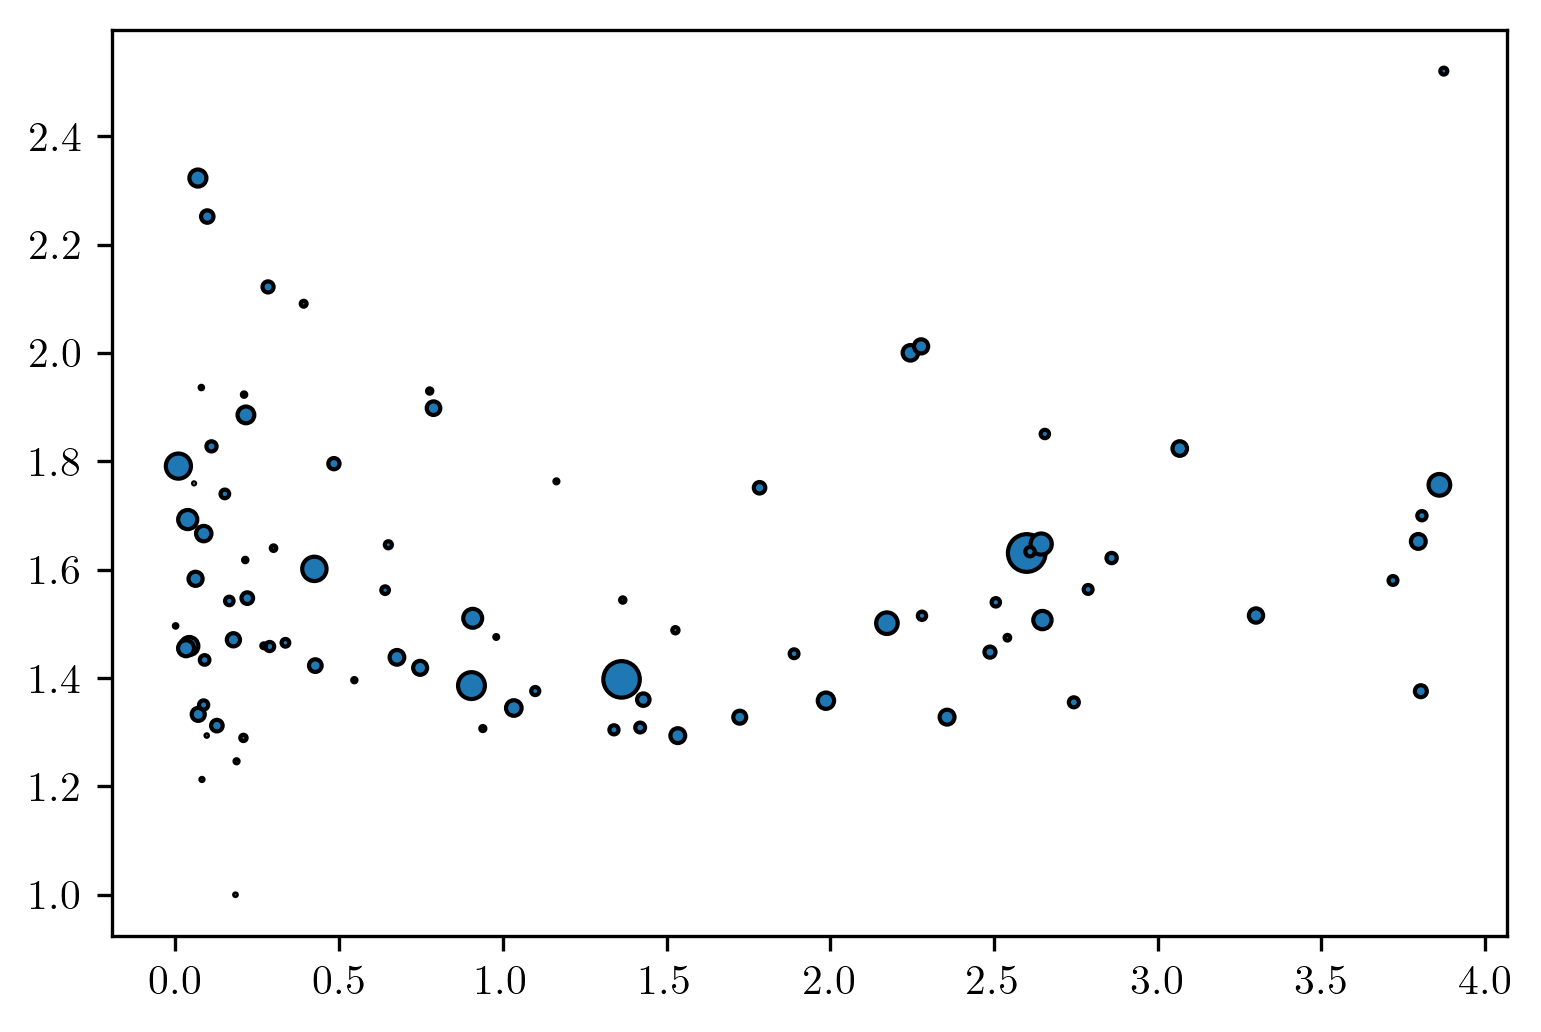

In [96]:
f,ax= plt.subplots(dpi=300)
ax.scatter(
    f2['weighted_height'],
    f2['ratio'],
    s=f2['pop']/100000,
    edgecolors='k'
)
# ax.set_ylim(.5,3)

In [97]:
mea = f2['ratio'].mean()

wmea = (f2['ratio']*f2['pop']).sum()/f2['pop'].sum()

In [98]:
co = f2['country']

In [99]:
dic_ = co.drop_duplicates().reset_index(drop=True).reset_index().set_index('country')['index'].to_dict()

In [100]:
f2['ci']=f2['country'].replace(dic_)

In [101]:
cm = plt.get_cmap('tab10')

In [102]:
cs = [cm(i) for l,i in f2['ci'].items()]

In [103]:
from sklearn.linear_model import QuantileRegressor,LinearRegression

In [104]:
qr = QuantileRegressor(alpha=0)
qr1 = LinearRegression()
qr2 = LinearRegression()

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
f2_ = f2.sort_values('weighted_height')
X = f2_[['weighted_height']]
y = f2_[['ratio']]

In [107]:
s1 = StandardScaler()
s2 = StandardScaler()

In [108]:
X1 = s1.fit_transform(X)
y1 = s2.fit_transform(y)

In [109]:
qr.fit(X1,y1[:,0])
qr1.fit(X1,y1[:,0])
qr2.fit(X,y.values[:,0])

LinearRegression()

In [110]:
yp11 = qr.predict(X1)
yp12 = qr1.predict(X1)
yp13 = qr2.predict(X)

In [111]:
yp111 = s2.inverse_transform(yp11.reshape(-1,1))[:,0]
yp112 = s2.inverse_transform(yp12.reshape(-1,1))[:,0]

In [112]:
means = {}
wmeans_ = {}
fits = {}
f_xy = {}
for c in dic_.keys():
    boo = f2['country']==c
    means[c]=f2[boo]['ratio'].mean()
    _f = f2[boo].sort_values('weighted_height')
    wm = (_f['ratio'] * _f['pop']).sum()/_f['pop'].sum()
    wmeans_[c]=wm
    
    
    lr = QuantileRegressor(alpha=0)
#     lr = LinearRegression()
    _X = _f[['weighted_height']]
    _y = _f['ratio']
    lr.fit(_X,_y)
    fits[c] = lr
    f_xy[c] = [_X.values[:,0],lr.predict(_X)]
    

In [113]:
means = pd.Series(means).sort_values(ascending=False).to_dict()
dic = {}
wmeans = {}
for i,v in means.items():
    dic[i] = dic_[i]
    wmeans[i] = wmeans_[i]

dic = {'Peru': 6,
 'Bolivia': 0,
 'Ecuador': 4,
 'Colombia': 3,
 }

<AxesSubplot:>

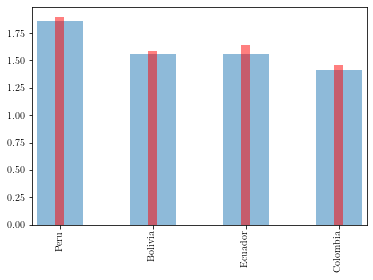

In [114]:
pd.Series(means).plot.bar(alpha=.5)
pd.Series(wmeans).plot.bar(alpha=.5,color='r',width=.1)

In [115]:


doff = {
    'Peru': 0,
     'Bolivia': 0,
     'Ecuador': -.015,
     'Colombia': -.02,
     'Brazil': 0,
     'Paraguay': 0,
     'Chile': 0,
     'Uruguay': 0
}

In [116]:
coef = np.round(np.round(qr2.coef_[0],2)+.000000001,2)

In [117]:
fy = f'$y = {coef:.2f}x + {qr2.intercept_:.2f}$'

In [118]:
f2['ci']=f2['country'].replace(dic)
cs = [cm(i) for l,i in f2['ci'].items()]

In [119]:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

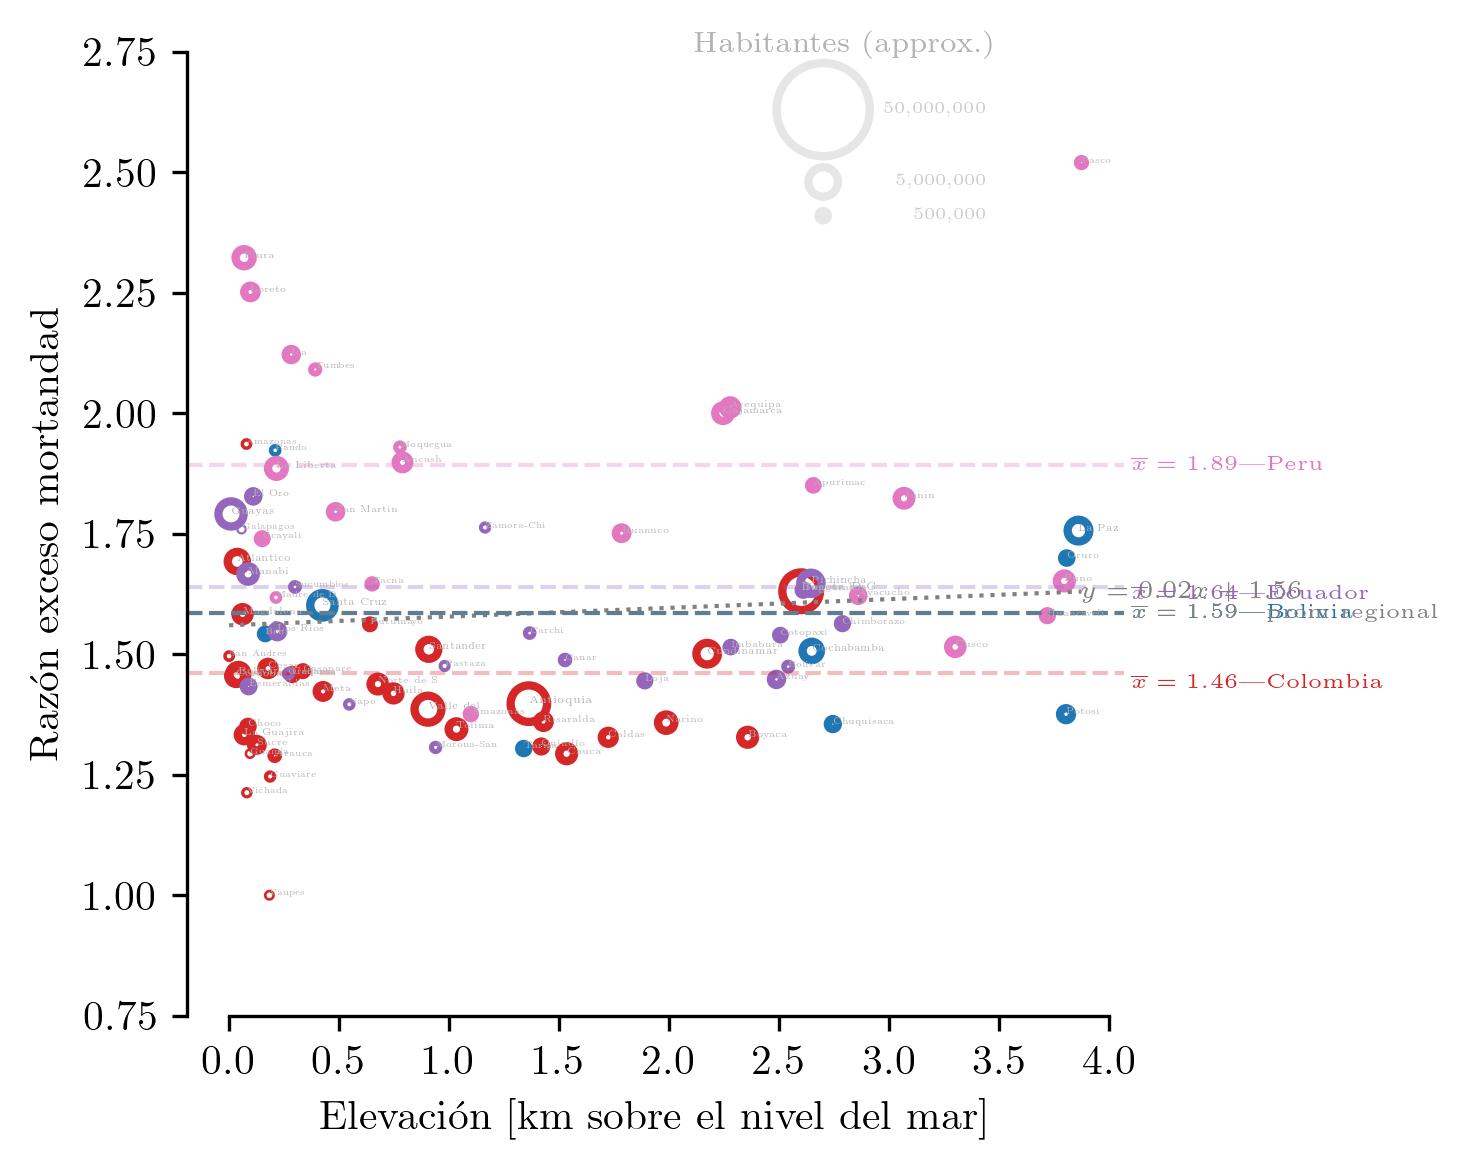

In [120]:
f,ax= plt.subplots(dpi=300,figsize=(5,4))
ax.scatter(
    f2['weighted_height'],
    f2['ratio'],
    s=f2['pop']/100000,
    edgecolors=cs,
    lw=2,
    facecolor='none'
)
ax.set_ylim(.75,2.75)
ax.axhline(wmea,c='.5',ls='--',lw=1)
ax.plot(X.values[:,0],yp13,ls=':',c='.5',lw=1)
ax.text(X.values[-1,0],yp13[-1],fy,va='center',fontsize=6,c='.5')



sns.despine(f,trim=True)
ax.set_ylabel('Razón exceso mortandad')
ax.set_xlabel('Elevación [km sobre el nivel del mar]')

# al = {0:'bottom',1:'top'}

for i,c in enumerate(dic.keys()):
    ax.axhline(wmeans[c],alpha=.3,lw=1,ls='--',c=cm(dic[c]))
#   ax.plot(*f_xy[c],ls='-.',lw=1,alpha=.5)
#   ax.text(.5,1-i/20,c,transform=ax.transAxes,c=cm(dic[c]))
    ax.text(4.1,wmeans[c]+doff[c],f'$\overline{{x}}={wmeans[c]:.2f}$|{c}',
            fontsize=5,c=cm(dic[c]),va='center')
    pass

ax.text(4.1,wmea,f'$\overline{{x}}={wmea:.2f}$|prom regional',
        fontsize=5,c='.5',va='center')

for i,r in f2.iterrows():
    ax.text(r['weighted_height'],r['ratio'],
           r['adm'][:10], fontsize = (r['pop'])**.5/5000+2,
            c='.7'
           )
xx = [2.7,2.7,2.7]
yy = [2.63,2.48,2.41]
pp = [5e7,5e6,5e5]
ax.scatter(
    xx,
    yy,
    s=np.array(pp)/100000,
    lw=2,
    facecolor='none',
    edgecolor='.9')

for x,y,p in zip(xx,yy,pp):
    ax.text(x+.75,y,f'{int(p):,}',va='center',ha='right',fontsize=4,c='.8')
    
ax.text(xx[0]+.1,2.75,'Habitantes (approx.)',fontsize=7,c='.7',ha='center')
f.tight_layout()
f.savefig('reg_alt_alt.pdf')
f.savefig('reg_alt_alt.png')